# Visualizations for Models

##Visualization code:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def visualize_confusion_matrix(conf_matrix):
    """
    Visualizes the confusion matrix using a heatmap.

    Parameters:
    - conf_matrix (numpy.ndarray): 2D array representing the confusion matrix.
    - labels (list): List of labels for both axes.

    Returns:
    - None
    """
    plt.figure(figsize=(8, 6))

    # Set black background
    sns.set_style("dark")

    # Use a purple color palette
    cmap = sns.dark_palette("purple", as_cmap=True)
    labels = ['silence', 'unknown', 'yes', 'no']
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, linewidths=.5, cbar=True,
                xticklabels=labels, yticklabels=labels)

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.show()

#example
#visualize_confusion_matrix(conf_matrix_example)

In [3]:

# SINGLE FC:
single_fc_matrix = np.array([[191, 4, 10, 1],
                             [1, 116, 29, 60],
                             [5, 15, 385, 14],
                             [3, 64, 15, 323]])

# LOW LATENCY CONV:
low_latency_conv_matrix = np.array([[200, 2, 2, 2],
                                    [1, 130, 27, 48],
                                    [4, 10, 393, 12],
                                    [4, 33, 9, 359]])

# CONV:
conv_matrix = np.array([[206, 0, 0, 0],
                        [6, 181, 5, 14],
                        [6, 7, 405, 1],
                        [2, 10, 6, 387]])

# TINY CONV:
tiny_conv_matrix = np.array([[202, 0, 1, 3],
                             [2, 151, 12, 41],
                             [2, 13, 398, 6],
                             [2, 19, 6, 378]])

# TINY EMBEDDING CONV:
tiny_embedding_conv_matrix = np.array([[196, 1, 3, 6],
                                       [3, 105, 31, 67],
                                       [3, 7, 391, 18],
                                       [2, 32, 11, 360]])

# Display the matrices
'''
print("SINGLE FC:")
print(single_fc_matrix)

print("\nLOW LATENCY CONV:")
print(low_latency_conv_matrix)

print("\nCONV:")
print(conv_matrix)

print("\nTINY CONV:")
print(tiny_conv_matrix)

print("\nTINY EMBEDDING CONV:")
print(tiny_embedding_conv_matrix)
'''

'\nprint("SINGLE FC:")\nprint(single_fc_matrix)\n\nprint("\nLOW LATENCY CONV:")\nprint(low_latency_conv_matrix)\n\nprint("\nCONV:")\nprint(conv_matrix)\n\nprint("\nTINY CONV:")\nprint(tiny_conv_matrix)\n\nprint("\nTINY EMBEDDING CONV:")\nprint(tiny_embedding_conv_matrix)\n'

In [4]:
def create_accuracy_bar_chart(data):
    """
    Creates a bar chart of accuracy values with a purple color palette.

    Parameters:
    - final_test_accuracy (float): Final test accuracy value.
    - quantized_model_accuracy (float): Quantized model accuracy value.
    - float_model_accuracy (float): Float model accuracy value.

    Returns:
    - None
    """
    final_test_accuracy = data[0]
    float_model_accuracy = data[1]
    quantized_model_accuracy = data[2]

    values = [final_test_accuracy, quantized_model_accuracy, float_model_accuracy]
    labels = ['Final Test', 'Quantized Model', 'Float Model']

    # Set a purple color palette
    sns.set_palette("dark:purple")

    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color=sns.color_palette())
    plt.ylim(70, 100)

    plt.title('Accuracy Comparison')
    plt.ylabel('Accuracy (%)')

    plt.show()

In [5]:

def plot_multiple_accuracies(*data_sets):
    """
    Plots multiple bar charts of accuracy values side by side.

    Parameters:
    - data_sets: Variable number of accuracy data sets.

    Returns:
    - None
    """
    num_sets = len(data_sets)
    models = ['single_fc_acc', 'll_conv_acc', 'conv_acc', 'tiny_conv_acc', 'tiny_embed_acc']
    # Set a purple color palette
    sns.set_palette("dark:purple")

    # Create subplots with one row and 'num_sets' columns
    fig, axes = plt.subplots(1, num_sets, figsize=(16, 6), sharey=True)

    for i, data in enumerate(data_sets):
        final_test_accuracy, quantized_model_accuracy, float_model_accuracy = data

        values = [final_test_accuracy, quantized_model_accuracy, float_model_accuracy]
        labels = ['Final Test', 'Quantized Model', 'Float Model']

        # Create a bar chart on the i-th subplot
        axes[i].bar(labels, values, color=sns.color_palette(), )
        axes[i].set_ylim(70, 100)  # Set y-axis limits for consistency
        axes[i].set_xticklabels(labels, rotation=45)
        axes[i].set_title('Model: ' + models[i])
        axes[i].set_ylabel('Accuracy (%)')

    plt.suptitle('Accuracy Comparison - Multiple Sets', y=1.05)  # Add a title above subplots
    plt.show()

In [6]:
single_fc_acc = [82.1, 84.385113, 84.304207]
ll_conv_acc = [87.5, 87.135922, 87.216828]
conv_acc = [95.4, 94.822006, 95.064725 ]
tiny_conv_acc = [91.3, 90.291262, 90.210356]
tiny_embed_acc = [85.1, 85.194175, 85.194175]

In [7]:
def compare_model_sizes(models_size):
    """
    Creates a bar graph comparing the sizes of two models.

    Parameters:
    - models_size (list): List containing two elements representing the sizes of float and quantized models.

    Returns:
    - None
    """
    float_model_size, quant_model_size = models_size
    model_sizes = [float_model_size, quant_model_size]
    labels = ['Float Model', 'Quantized Model']

    # Set a purple color palette
    sns.set_palette("dark:purple")

    plt.figure(figsize=(8, 6))
    bars = plt.bar(labels, model_sizes, color=sns.color_palette())

    plt.title('Model Size Comparison')
    plt.ylabel('Size (bytes)')

    # Add data labels on top of the bars
    for bar, size in zip(bars, model_sizes):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{size}', ha='center', color = 'white', fontweight='bold')

    plt.show()

In [8]:
def plot_multiple_models(data_sets, model_names):
    """
    Plots multiple bar charts of accuracy values side by side.

    Parameters:
    - data_sets: Variable number of accuracy data sets.

    Returns:
    - None
    """
    num_sets = len(data_sets)
    models = model_names

    # Set a purple color palette
    sns.set_palette("dark:purple")

    # Create subplots with one row and 'num_sets' columns
    fig, axes = plt.subplots(1, num_sets, figsize=(16, 6), sharey=True)

    for i, data in enumerate(data_sets):
        float_model_size, quantized_model_size = data

        values = [float_model_size, quantized_model_size]
        labels = ['Float Model', 'Quant Model']

        # Create a bar chart on the i-th subplot
        bars = axes[i].bar(labels, values, color=sns.color_palette(), )
        axes[i].set_xticklabels(labels, rotation=45)
        # Add data labels on top of the bars
        for bar, value in zip(bars, values):
            axes[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{value:.2f} By', ha='center', color='black', fontweight='bold')

        axes[i].set_title(models[i])
        axes[i].set_ylabel('Size:')

    plt.suptitle('Size Comparison - Multiple Sets', y=1.05)  # Add a title above subplots
    plt.show()

In [9]:
single_fc_model_size = [32332, 9016]
ll_conv_model_size = [3505176, 883704]
conv_model_size = [1210904, 308160]
tiny_conv_model_size = [68356, 18960]
tiny_embed_model_size = [26528, 8872]

# SINGLE FC:

\begin{bmatrix}
191 & 4 & 10 & 1 \\
1 & 116 & 29 & 60 \\
5 & 15 & 385 & 14 \\
3 & 64 & 15 & 323 \\
\end{bmatrix}


Final test accuracy = 82.1\% (N=1236) \\

Float model is 32332 bytes \\
Quantized model is 9016 bytes

Float model accuracy is 84.385113\% (Number of test samples=1236) \\
Quantized model accuracy is 84.304207\% (Number of test samples=1236)


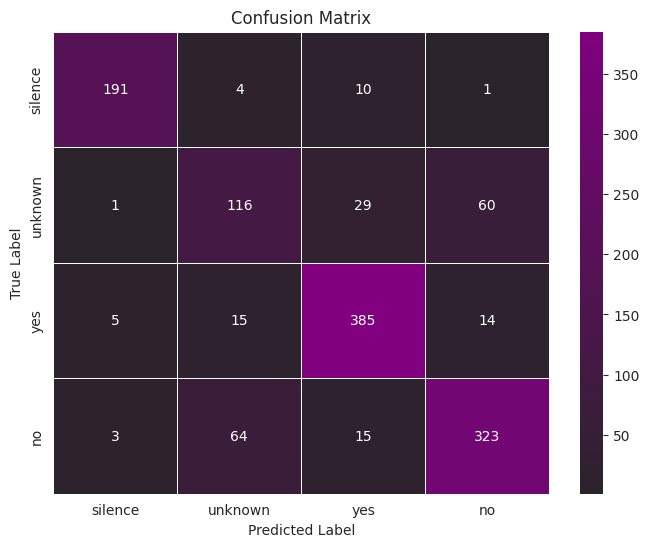

In [10]:
visualize_confusion_matrix(single_fc_matrix)

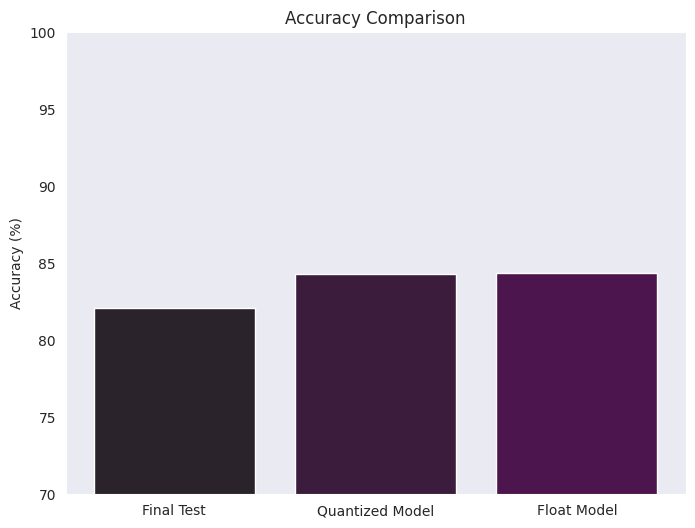

In [11]:
create_accuracy_bar_chart(single_fc_acc)

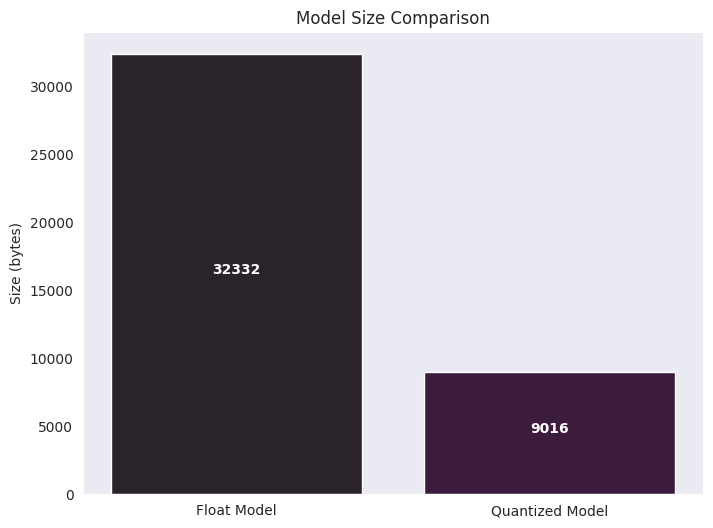

In [12]:
compare_model_sizes(single_fc_model_size)


#LOW LATENCY CONV:


\begin{bmatrix}
200 & 2 & 2 & 2 \\
1 & 130 & 27 & 48 \\
4 & 10 & 393 & 12 \\
4 & 33 & 9 & 359 \\
\end{bmatrix}


Final test accuracy = 87.5\% (N=1236) \\

Float model is 3505176 bytes \\
Quantized model is 883704 bytes

Float model accuracy is 87.135922\% (Number of test samples=1236) \\
Quantized model accuracy is 87.216828\% (Number of test samples=1236)



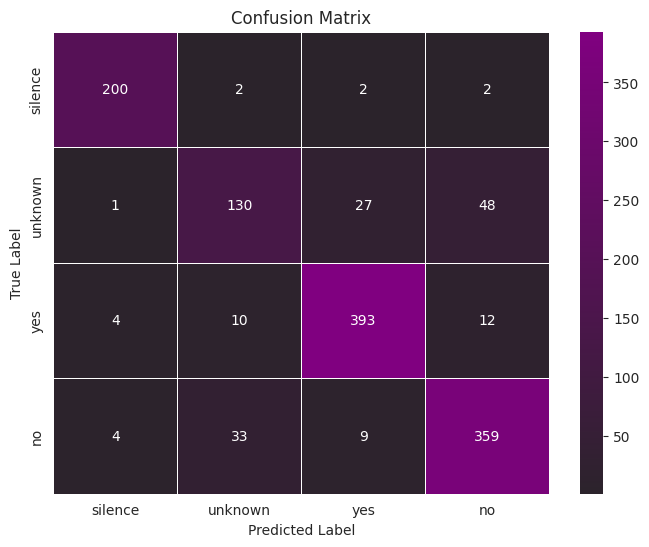

In [13]:
visualize_confusion_matrix(low_latency_conv_matrix)

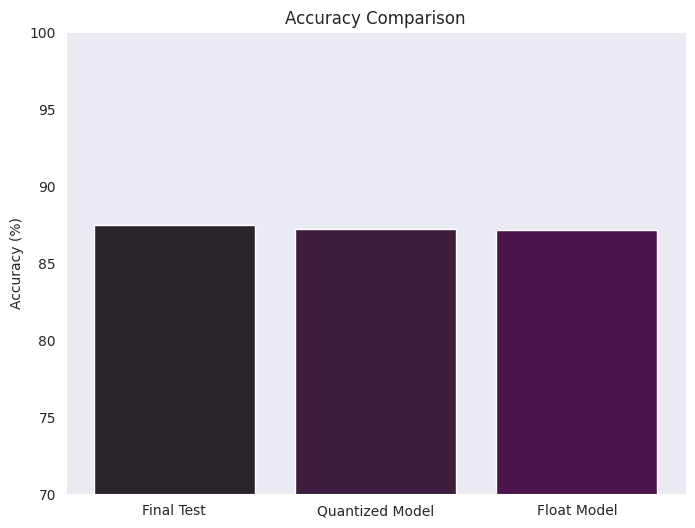

In [14]:
create_accuracy_bar_chart(ll_conv_acc)

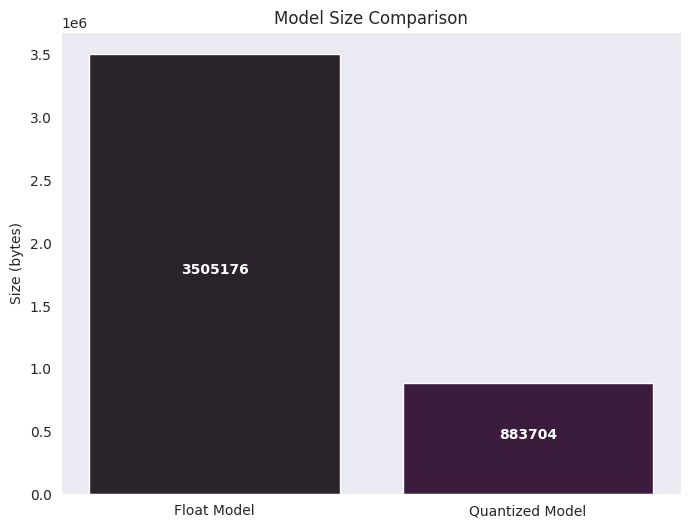

In [15]:
compare_model_sizes(ll_conv_model_size)


# CONV:


\begin{bmatrix}
206 & 0 & 0 & 0 \\
6 & 181 & 5 & 14 \\
6 & 7 & 405 & 1 \\
2 & 10 & 6 & 387 \\
\end{bmatrix}


Final test accuracy = 95.4\% (N=1236) \\

Float model is 1210904 bytes \\
Quantized model is 308160 bytes



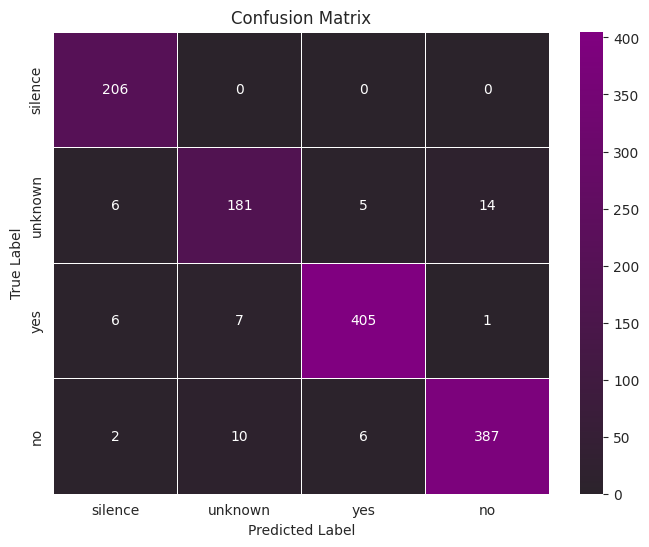

In [16]:
visualize_confusion_matrix(conv_matrix)


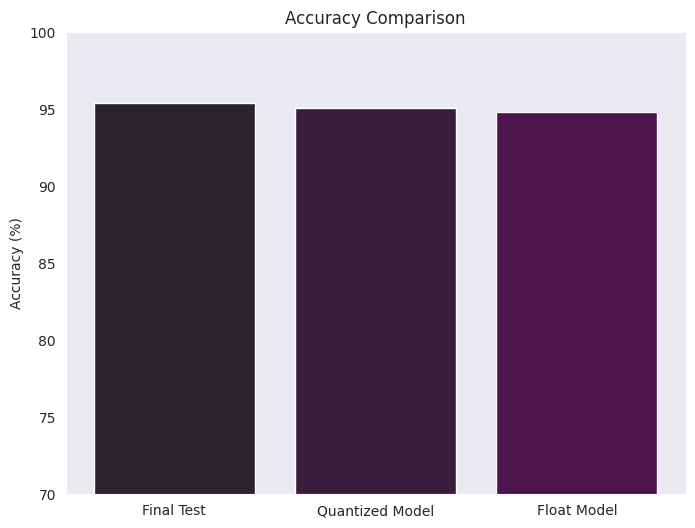

In [17]:
create_accuracy_bar_chart(conv_acc)

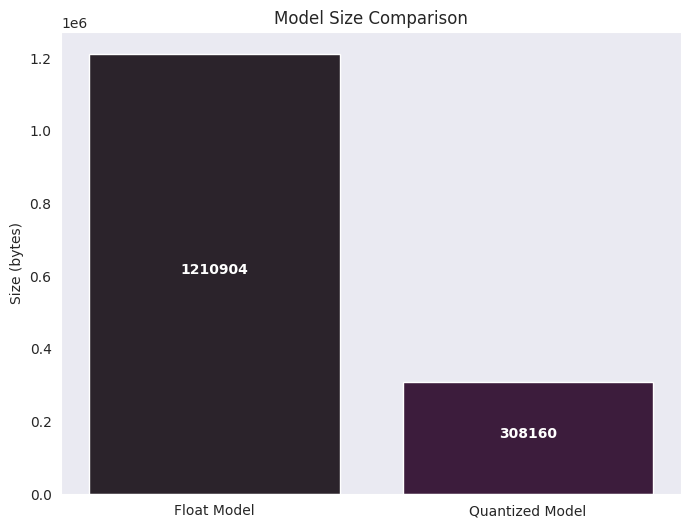

In [18]:
compare_model_sizes(conv_model_size)


#TINY CONV:

\begin{bmatrix}
202 & 0 & 1 & 3 \\
2 & 151 & 12 & 41 \\
2 & 13 & 398 & 6 \\
2 & 19 & 6 & 378 \\
\end{bmatrix}

Final test accuracy = 91.3\% (N=1236)

Float model is 68356 bytes \\
Quantized model is 18960 bytes

Float model accuracy is 90.291262\% (Number of test samples=1236) \\
Quantized model accuracy is 90.210356\% (Number of test samples=1236)




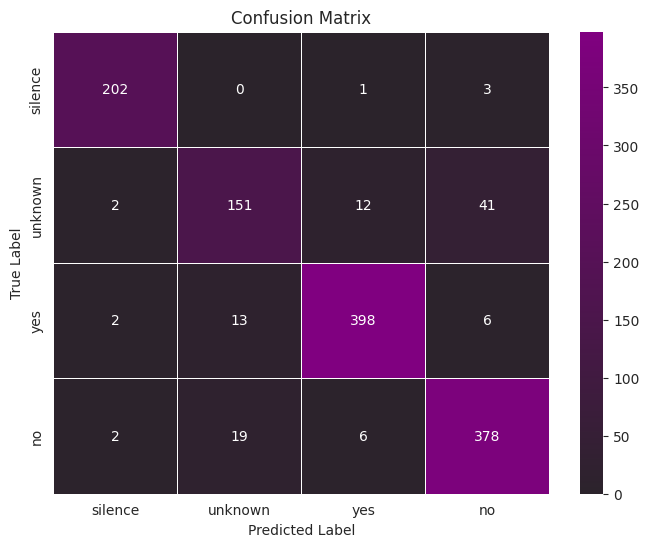

In [19]:
visualize_confusion_matrix(tiny_conv_matrix)

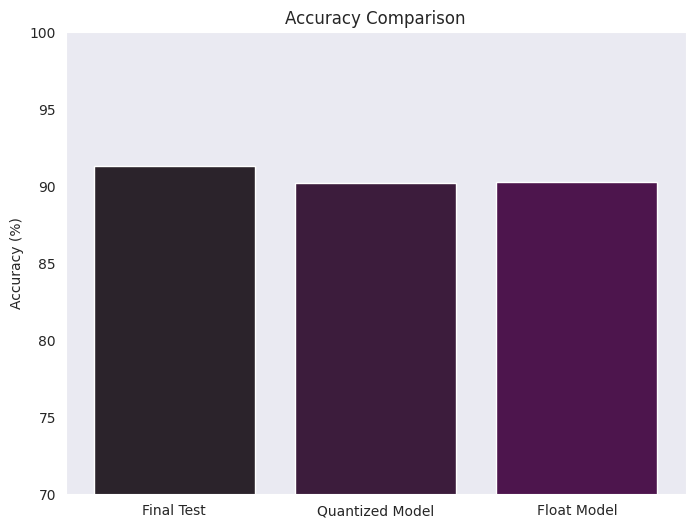

In [20]:
create_accuracy_bar_chart(tiny_conv_acc)

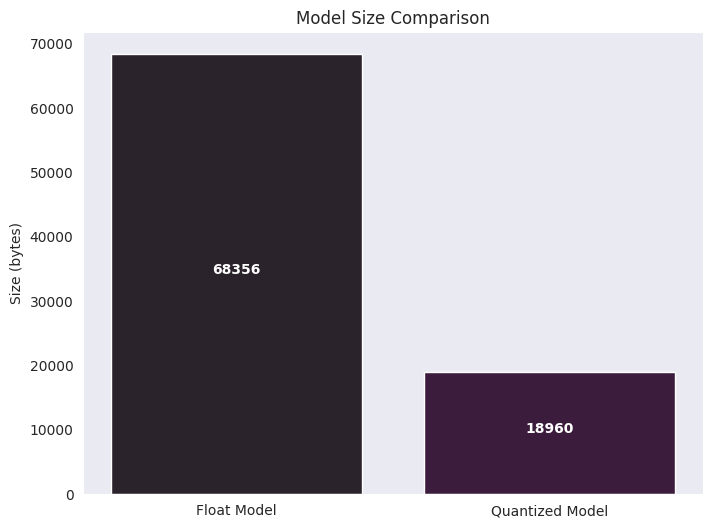

In [21]:
compare_model_sizes(tiny_conv_model_size)

# TINY EMBEDDING CONV:

\begin{bmatrix}
196 & 1 & 3 & 6 \\
3 & 105 & 31 & 67 \\
3 & 7 & 391 & 18 \\
2 & 32 & 11 & 360 \\
\end{bmatrix}

Final test accuracy = 85.1\% (N=1236)

Float model is 26528 bytes \\
Quantized model is 8872 bytes

Float model accuracy is 85.194175\% (Number of test samples=1236) \\
Quantized model accuracy is 85.194175\% (Number of test samples=1236)


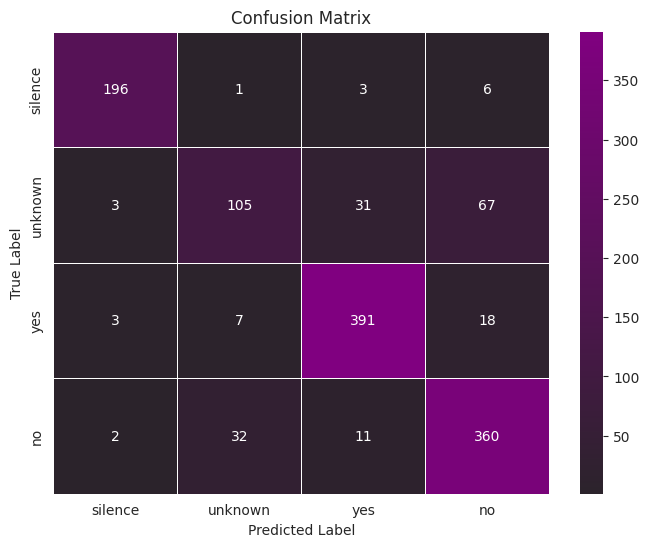

In [22]:
visualize_confusion_matrix(tiny_embedding_conv_matrix)

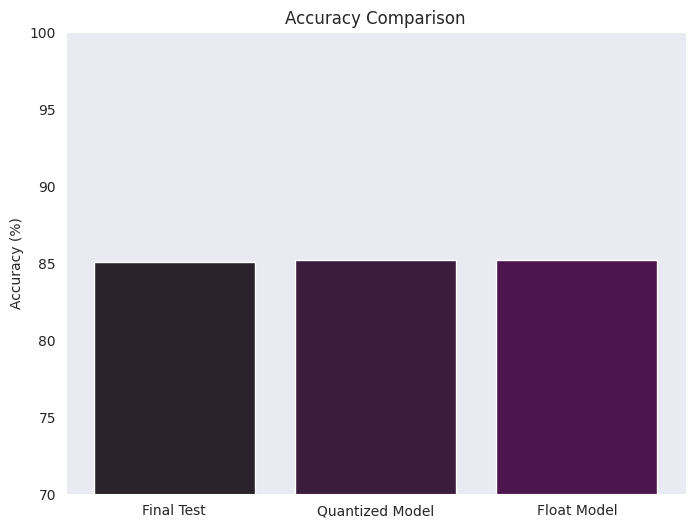

In [23]:
create_accuracy_bar_chart(tiny_embed_acc)

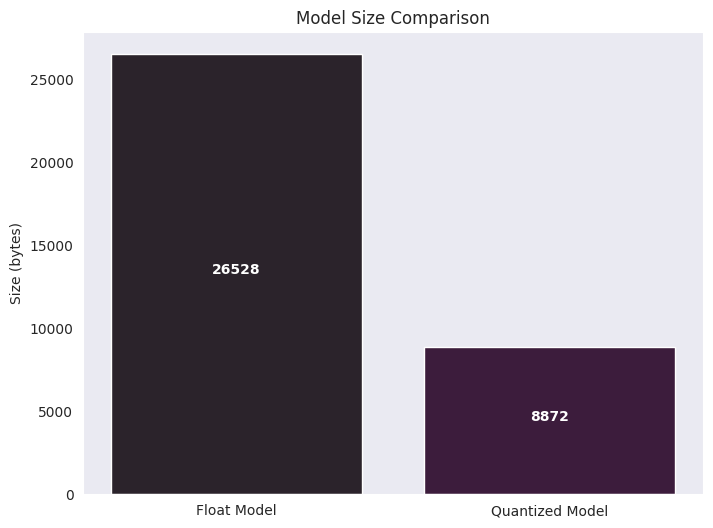

In [24]:
compare_model_sizes(tiny_embed_model_size)

## Comparison of Models

<ipython-input-5-3163f59abfcb>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(labels, rotation=45)


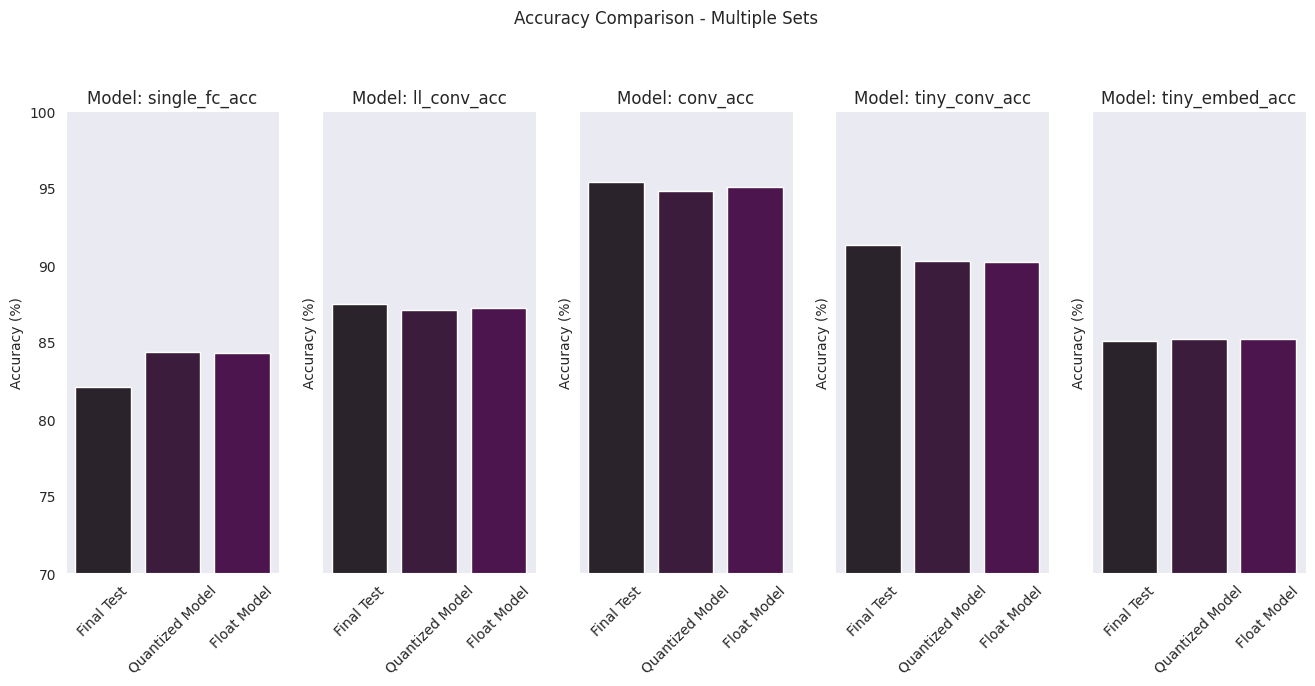

In [25]:
plot_multiple_accuracies(single_fc_acc, ll_conv_acc, conv_acc, tiny_conv_acc, tiny_embed_acc)

<ipython-input-8-b155b7b78e27>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(labels, rotation=45)


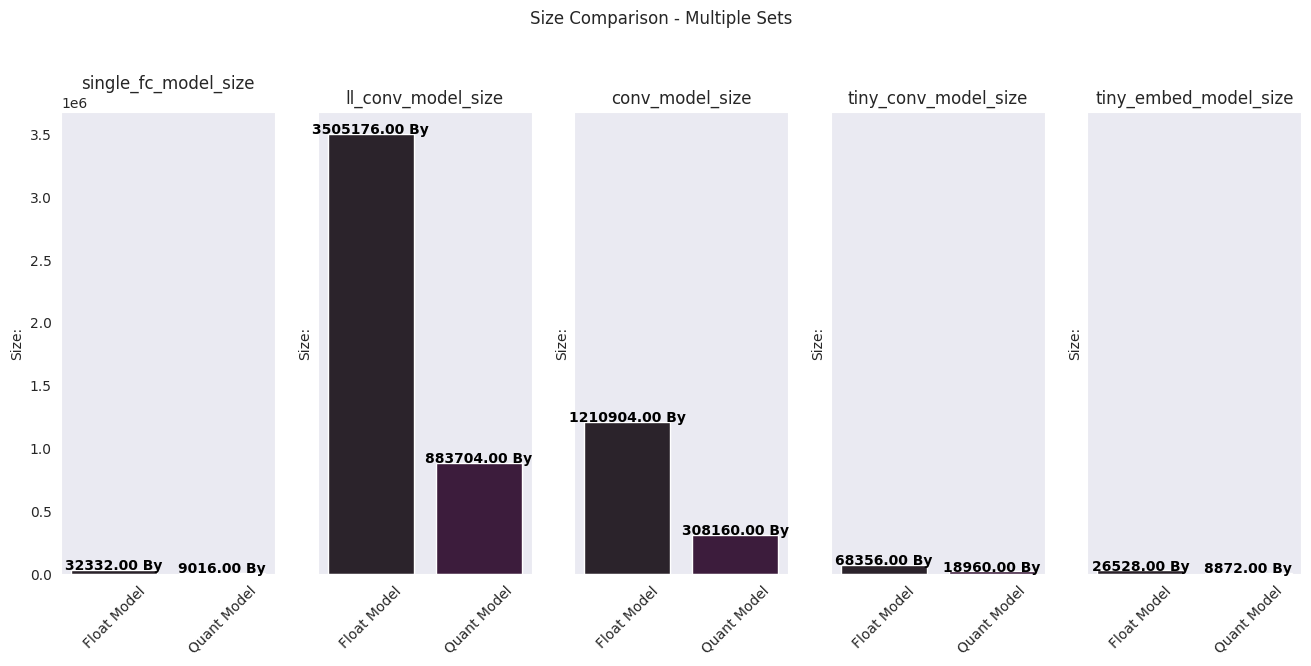

In [26]:
all_models = [single_fc_model_size, ll_conv_model_size, conv_model_size, tiny_conv_model_size, tiny_embed_model_size]
all_model_names = ['single_fc_model_size', 'll_conv_model_size', 'conv_model_size', 'tiny_conv_model_size', 'tiny_embed_model_size']
plot_multiple_models(all_models, all_model_names)

<ipython-input-8-b155b7b78e27>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(labels, rotation=45)


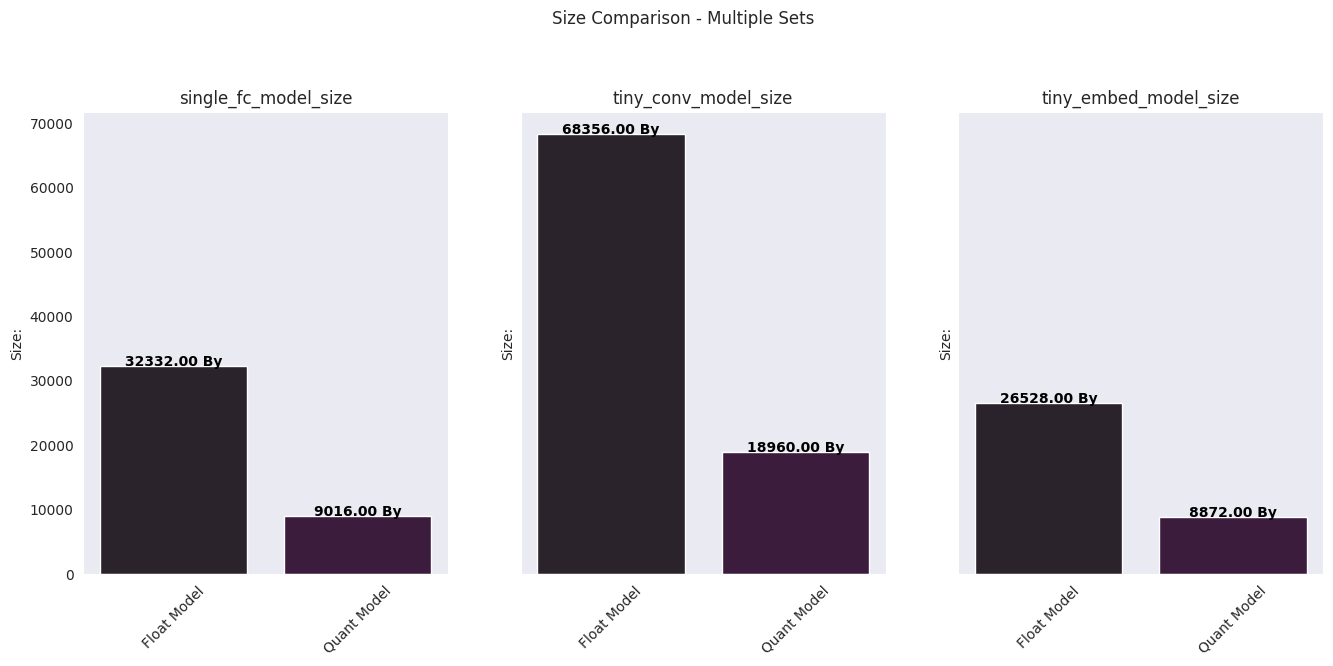

In [27]:
all_models = [single_fc_model_size, tiny_conv_model_size, tiny_embed_model_size]
all_model_names = ['single_fc_model_size', 'tiny_conv_model_size', 'tiny_embed_model_size']
plot_multiple_models(all_models, all_model_names)